## Read data

In [18]:
import pandas as pd

df_orig = pd.read_csv('datasets/KOI_2025.10.03_07.23.34.csv', skiprows=144)

## Clean data

In [32]:
df = df_orig.copy()
print("Original shape:", df.shape)

# Drop columns where ALL values are NaN
df = df.dropna(axis=1, how='all')
print("After dropping all-empty columns:", df.shape)
# Drop rows where ALL values are NaN
df = df.dropna(axis=0, how='all')

print("After dropping all-empty rows:", df.shape)
print(df['koi_disposition']) #

Original shape: (9564, 141)
After dropping all-empty columns: (9564, 122)
After dropping all-empty rows: (9564, 122)
0            CONFIRMED
1            CONFIRMED
2            CANDIDATE
3       FALSE POSITIVE
4            CONFIRMED
             ...      
9559    FALSE POSITIVE
9560         CANDIDATE
9561    FALSE POSITIVE
9562         CANDIDATE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 9564, dtype: object


In [43]:
for col in df.columns:
    if df[col].count() <1000:
        print(col, "less than 10")

#### Remove specified columns

In [44]:
# Remove columns not for model

columns_to_remove = ["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score"]

In [47]:
df[columns_to_remove]

,rowid,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score
0,1,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000
1,2,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969
2,3,10811496,K00753.01,NaN,CANDIDATE,0.000
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0.000
4,5,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000
...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,0.000
9560,9561,10128825,K07986.01,NaN,CANDIDATE,0.497
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,0.021
9562,9563,10155286,K07988.01,NaN,CANDIDATE,0.092


In [49]:
df_rem = df.drop(columns=columns_to_remove)
df_rem.head()

,koi_disposition,koi_vet_stat,koi_vet_date,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,CANDIDATE,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,FALSE POSITIVE,Done,2018-08-16,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


#### Filtered on Confirmed and X

In [50]:
label_A = "CONFIRMED"
label_B = "FALSE POSITIVE"
# Step 1: Filter out "CANDIDATE"
df_rem = df_rem[df_rem['koi_disposition'].isin([label_A, label_B])].copy()

print("Remaining dispositions:\n", df_rem['koi_disposition'].value_counts())

Remaining dispositions:
 koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
Name: count, dtype: int64


## EAD

Shape of dataset: (9564, 141)
Columns available: ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1'] ...

Disposition value counts:
 koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


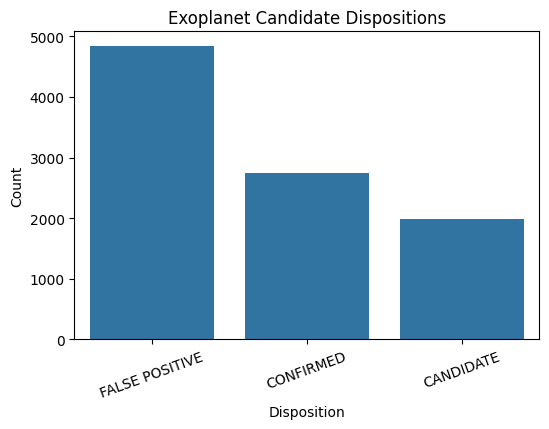

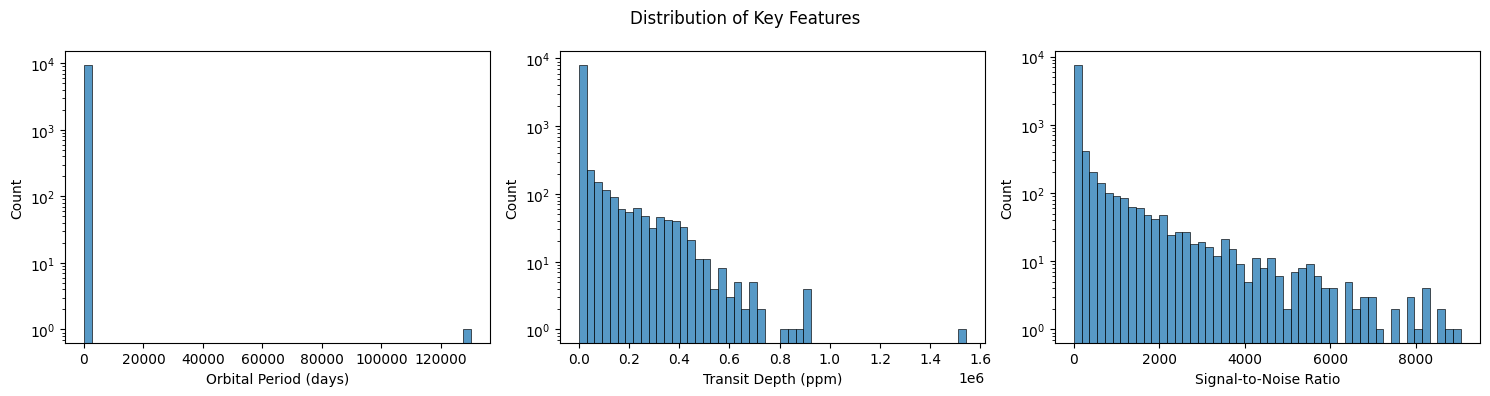

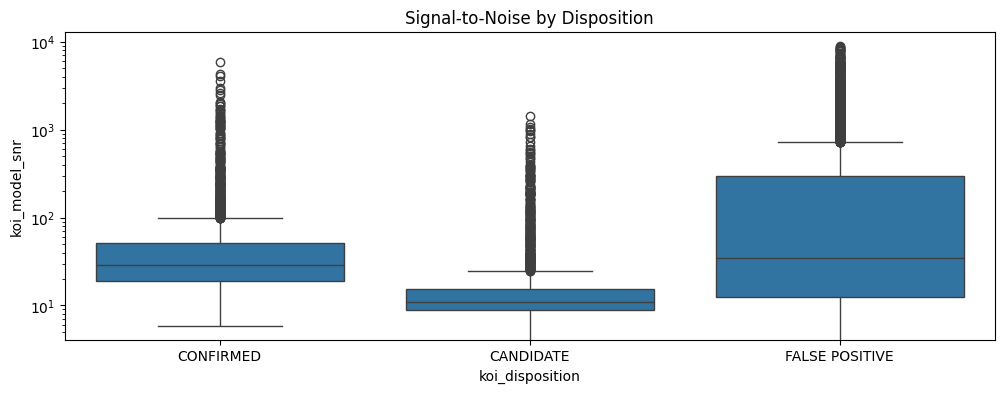

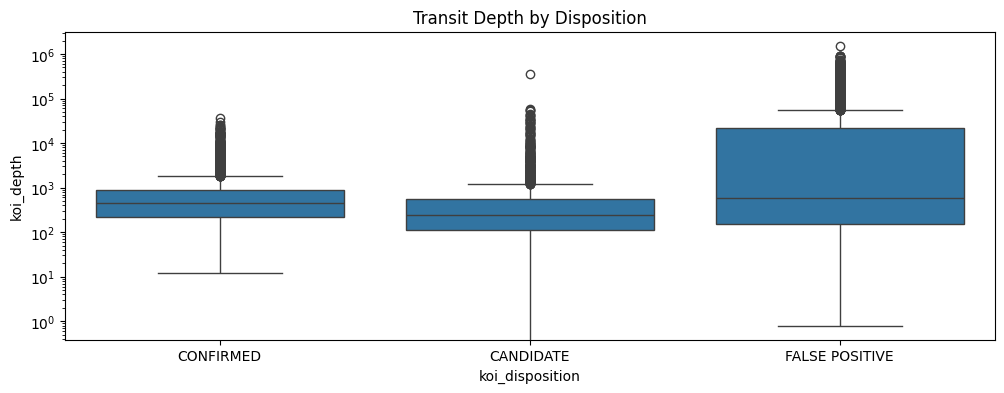


koi_fpflag_nt value counts:
 koi_fpflag_nt
0      8033
1      1530
465       1
Name: count, dtype: int64

koi_fpflag_ss value counts:
 koi_fpflag_ss
0    7338
1    2226
Name: count, dtype: int64

koi_fpflag_co value counts:
 koi_fpflag_co
0    7675
1    1889
Name: count, dtype: int64

koi_fpflag_ec value counts:
 koi_fpflag_ec
0    8416
1    1148
Name: count, dtype: int64


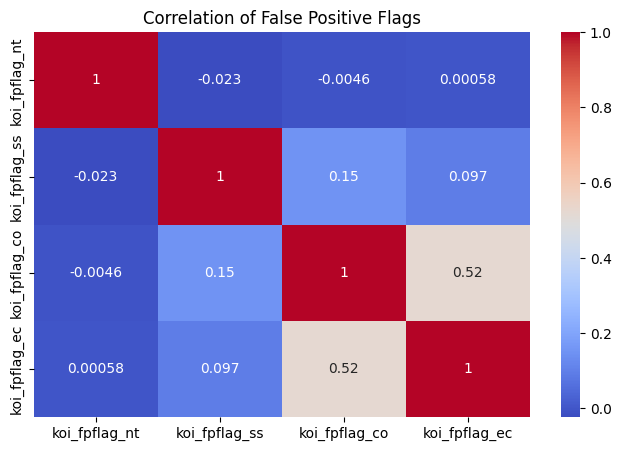

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Basic info ---
print("Shape of dataset:", df.shape)
print("Columns available:", df.columns.tolist()[:20], "...")  # show first 20 cols
print("\nDisposition value counts:\n", df['koi_disposition'].value_counts())

# --- 2. Label balance (planet vs false positive vs candidate) ---
plt.figure(figsize=(6,4))
sns.countplot(x="koi_disposition", data=df, order=df['koi_disposition'].value_counts().index)
plt.title("Exoplanet Candidate Dispositions")
plt.ylabel("Count")
plt.xlabel("Disposition")
plt.xticks(rotation=20)
plt.show()

# --- 3. Key distributions (period, depth, signal-to-noise ratio) ---
# koi_period = orbital period (days)
# koi_depth = transit depth (ppm)
# koi_model_snr = model signal-to-noise ratio
features = ['koi_period', 'koi_depth', 'koi_model_snr']
titles = ['Orbital Period (days)', 'Transit Depth (ppm)', 'Signal-to-Noise Ratio']

plt.figure(figsize=(15,4))
for i, (feat, title) in enumerate(zip(features, titles)):
    plt.subplot(1,3,i+1)
    sns.histplot(df[feat].dropna(), bins=50, kde=False)
    plt.xlabel(title)
    plt.ylabel("Count")
    plt.yscale("log")  # log scale helps with skewed distributions
plt.suptitle("Distribution of Key Features")
plt.tight_layout()
plt.show()

# --- 4. Compare distributions by disposition ---
plt.figure(figsize=(12,4))
sns.boxplot(x="koi_disposition", y="koi_model_snr", data=df)
plt.title("Signal-to-Noise by Disposition")
plt.yscale("log")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x="koi_disposition", y="koi_depth", data=df)
plt.title("Transit Depth by Disposition")
plt.yscale("log")
plt.show()

# --- 5. Noise patterns exploration ---
# Flag columns indicate potential false positives
fp_flags = ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec']

for col in fp_flags:
    if col in df.columns:
        print(f"\n{col} value counts:\n", df[col].value_counts())

plt.figure(figsize=(8,5))
sns.heatmap(df[fp_flags].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of False Positive Flags")
plt.show()


In [ ]:


# # Step 2: Identify problematic columns
# # Columns where all CONFIRMED are missing OR all FALSE POSITIVE are missing
# confirmed = df_filtered[df_filtered['koi_disposition'] == 'CONFIRMED']
# false_pos = df_filtered[df_filtered['koi_disposition'] == 'FALSE POSITIVE']

# problematic_cols = []
# for col in df_filtered.columns:
#     if col == 'koi_disposition':  # skip label column
#         continue
#     # Check if all values missing in one class
#     if confirmed[col].isna().all() or false_pos[col].isna().all():
#         problematic_cols.append(col)

# print("\nColumns with missing values in one class only (to drop):")
# print(problematic_cols)

# # Step 3: Drop those columns
# df_clean = df_filtered.drop(columns=problematic_cols)

# print("\nFinal shape after cleaning:", df_clean.shape)

## Feature engineering: finding the relevant columns and creating new if needed

In [31]:
df_filtered.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.070,0.110,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100
